In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing all datasets
data = pd.read_csv("C:/Users/umprasad/Desktop/ML II_ Assignment/telecom_churn_data.csv")
data.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
data['av_rech_amt_data_6'].fillna(value=0,inplace=True)
data['av_rech_amt_data_7'].fillna(value=0,inplace=True)

In [6]:
data['av_rech_amt_data_6&7'] = (data['av_rech_amt_data_6']+data['av_rech_amt_data_7'])/2

In [7]:
data['av_rech_amt_data_6&7'].head(5)

0    252.0
1     77.0
2      0.0
3      0.0
4     28.0
Name: av_rech_amt_data_6&7, dtype: float64

In [8]:
data['av_rech_amt_data_6&7'].quantile(0.7)

12.5

In [9]:
high_value_cust = data.loc[data['av_rech_amt_data_6&7'] >= 12.5]

In [10]:
high_value_cust.shape

(30378, 227)

In [11]:
high_value_cust.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_data_6&7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00,77.0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00,28.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00,88.5
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00,77.0


In [12]:
# Checking the percentage of missing values
round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.36
std_og_t2o_mou           1.36
loc_ic_t2o_mou           1.36
last_date_of_month_6     0.00
last_date_of_month_7     0.19
last_date_of_month_8     0.77
last_date_of_month_9     1.44
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.51
onnet_mou_7              3.57
onnet_mou_8              5.90
onnet_mou_9              8.20
offnet_mou_6             3.51
offnet_mou_7             3.57
offnet_mou_8             5.90
offnet_mou_9             8.20
roam_ic_mou_6            3.51
roam_ic_mou_7            3.57
roam_ic_mou_8            5.90
roam_ic_mou_9            8.20
roam_og_mou_6            3.51
roam_og_mou_7            3.57
roam_og_mou_8            5.90
roam_og_mou_9            8.20
loc_og_t2t_mou_6         3.51
                        ...  
night_pck_user_6        20.24
night_pck_user_7        18.73
night_pck_

In [13]:
high_value_cust.drop(['circle_id',
           'loc_og_t2o_mou',
           'std_og_t2o_mou',
           'loc_ic_t2o_mou',
           'last_date_of_month_6',
           'last_date_of_month_7',
           'last_date_of_month_8',
           'last_date_of_month_9',
           'fb_user_6','fb_user_7',
           'fb_user_8','fb_user_9',
           'night_pck_user_6',
           'night_pck_user_7',
           'night_pck_user_8',
           'night_pck_user_9',
           'date_of_last_rech_data_9',
           'total_rech_data_6',
           'total_rech_data_7',
           'total_rech_data_8',
           'total_rech_data_9', 
           'max_rech_data_6',
           'max_rech_data_7', 
           'max_rech_data_8', 
           'max_rech_data_9',
           'count_rech_2g_6',
           'count_rech_2g_7',
           'count_rech_2g_8', 
           'count_rech_2g_9', 
           'count_rech_3g_6', 
           'count_rech_3g_7',
           'count_rech_3g_8', 
           'count_rech_3g_9', 
           'arpu_3g_6', 
           'arpu_3g_7',
           'arpu_3g_8',
           'arpu_3g_9', 
           'arpu_2g_6',
           'arpu_2g_7',
           'arpu_2g_8', 
           'arpu_2g_9',
           'date_of_last_rech_data_6',
           'date_of_last_rech_data_7',
           'date_of_last_rech_data_8',
           'roam_ic_mou_6',
           'roam_ic_mou_7',
           'roam_ic_mou_8',
           'roam_ic_mou_9',
           'roam_og_mou_6',
           'roam_og_mou_7',
           'roam_og_mou_8',
           'roam_og_mou_9',
           'std_og_t2c_mou_6',
           'std_og_t2c_mou_7',
           'std_og_t2c_mou_8',
           'std_og_t2c_mou_9',
           'isd_og_mou_6',
           'isd_og_mou_7',
           'isd_og_mou_8',
           'isd_og_mou_9',
           'og_others_6',
           'og_others_7',
           'og_others_8',
           'og_others_9',
           'std_ic_t2o_mou_6',
           'std_ic_t2o_mou_7',
           'std_ic_t2o_mou_8',
           'std_ic_t2o_mou_9',
           'monthly_2g_6',
           'monthly_2g_7',
           'monthly_2g_8',
           'monthly_2g_9',
           'sachet_2g_6',
           'sachet_2g_7',
           'sachet_2g_8',
           'sachet_2g_9',
           'monthly_3g_6',
           'monthly_3g_7',
           'monthly_3g_8',
           'monthly_3g_9',
           'sachet_3g_6',
           'sachet_3g_7',
           'sachet_3g_8',
           'sachet_3g_9',
           'date_of_last_rech_6',
           'date_of_last_rech_7',
           'date_of_last_rech_8',
           'date_of_last_rech_9',
           'av_rech_amt_data_6&7'], axis=1, inplace=True)

In [14]:
tag_churn_data = high_value_cust[['mobile_number','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

In [15]:
tag_churn_data.head(5)

,mobile_number,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,7000842753,0.00,0.00,0.0,0.0
1,7001865778,188.04,72.11,0.0,0.0
4,7000142493,205.31,104.59,0.0,0.0
8,7001524846,34.91,142.18,0.0,0.0
9,7001864400,412.63,151.33,0.0,0.0


In [16]:
tag_churn_data['total_ic_mou_9'].fillna(value=0.00,inplace=True)
tag_churn_data['total_og_mou_9'].fillna(value=0.00,inplace=True)
tag_churn_data['vol_2g_mb_9'].fillna(value=0.0,inplace=True)
tag_churn_data['vol_3g_mb_9'].fillna(value=0.0,inplace=True)

In [17]:
tag_churn_data.head(5)

,mobile_number,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,7000842753,0.00,0.00,0.0,0.0
1,7001865778,188.04,72.11,0.0,0.0
4,7000142493,205.31,104.59,0.0,0.0
8,7001524846,34.91,142.18,0.0,0.0
9,7001864400,412.63,151.33,0.0,0.0


In [18]:
tag_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30378 entries, 0 to 99998
Data columns (total 5 columns):
mobile_number     30378 non-null int64
total_ic_mou_9    30378 non-null float64
total_og_mou_9    30378 non-null float64
vol_2g_mb_9       30378 non-null float64
vol_3g_mb_9       30378 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.4 MB


In [19]:
cols_I =tag_churn_data.columns

In [20]:
tag_churn_data.shape

(30378, 5)

In [21]:
tag_churn_data['Sum'] = tag_churn_data['total_ic_mou_9'] + tag_churn_data['total_og_mou_9'] + tag_churn_data['vol_2g_mb_9'] + tag_churn_data['vol_3g_mb_9']

In [22]:
tag_churn_data.head(5)

,mobile_number,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,Sum
0,7000842753,0.00,0.00,0.0,0.0,0.00
1,7001865778,188.04,72.11,0.0,0.0,260.15
4,7000142493,205.31,104.59,0.0,0.0,309.90
8,7001524846,34.91,142.18,0.0,0.0,177.09
9,7001864400,412.63,151.33,0.0,0.0,563.96


In [23]:
Churn = []

In [24]:
for i in tag_churn_data.Sum:
    if  i > 0:
        Churn.append(0)
    else:
        Churn.append(1)

In [25]:
tag_churn_data.head(5)

,mobile_number,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,Sum
0,7000842753,0.00,0.00,0.0,0.0,0.00
1,7001865778,188.04,72.11,0.0,0.0,260.15
4,7000142493,205.31,104.59,0.0,0.0,309.90
8,7001524846,34.91,142.18,0.0,0.0,177.09
9,7001864400,412.63,151.33,0.0,0.0,563.96


In [26]:
tag_churn_data['Churn'] = Churn

In [27]:
tag_churn_data.head(5)

,mobile_number,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,Sum,Churn
0,7000842753,0.00,0.00,0.0,0.0,0.00,1
1,7001865778,188.04,72.11,0.0,0.0,260.15,0
4,7000142493,205.31,104.59,0.0,0.0,309.90,0
8,7001524846,34.91,142.18,0.0,0.0,177.09,0
9,7001864400,412.63,151.33,0.0,0.0,563.96,0


In [28]:
high_value_cust['Churn'] = tag_churn_data['Churn']

In [29]:
high_value_cust.head(5)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,...,83.57,150.76,109.61,0.0,968,30.40,0.00,101.20,3.58,1
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,...,0.00,0.00,0.00,0.0,1006,0.00,0.00,0.00,0.00,0
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,...,0.00,0.00,0.00,0.0,1526,0.00,0.00,0.00,0.00,0
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0.00,750.95,11.94,0.0,315,21.03,910.65,122.16,0.00,0
9,7001864400,119.518,247.435,170.231,160.042,33.89,30.11,22.43,27.84,63.48,...,0.00,0.00,0.00,0.0,902,0.00,0.00,0.00,0.00,0


In [30]:
cols = high_value_cust.columns

In [31]:
cols

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'Churn'],
      dtype='object', length=139)

In [32]:
cols_9 = []
cols_I = []

In [33]:
for c in cols:
    if c.find("_9") > 0:
        cols_9.append(c)
    else:
        cols_I.append(c)

In [34]:
cols_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'spl_og_mou_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9']

In [35]:
high_value_cust_I = high_value_cust[cols_I]

In [36]:
high_value_cust_I.head(5)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,5.75,83.57,150.76,109.61,968,30.40,0.00,101.20,3.58,1
1,7001865778,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,...,365.47,0.00,0.00,0.00,1006,0.00,0.00,0.00,0.00,0
4,7000142493,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,...,0.00,0.00,0.00,0.00,1526,0.00,0.00,0.00,0.00,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0.03,0.00,750.95,11.94,315,21.03,910.65,122.16,0.00,0
9,7001864400,119.518,247.435,170.231,33.89,30.11,22.43,63.48,54.16,78.34,...,0.00,0.00,0.00,0.00,902,0.00,0.00,0.00,0.00,0


In [37]:
high_value_cust_I.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30378 entries, 0 to 99998
Columns: 106 entries, mobile_number to Churn
dtypes: float64(91), int64(15)
memory usage: 24.8 MB


In [38]:
high_value_cust_I[cols_I] = high_value_cust_I[cols_I].replace(np.nan, 0)

In [39]:
high_value_cust_I.head(5)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,5.75,83.57,150.76,109.61,968,30.40,0.00,101.20,3.58,1
1,7001865778,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,...,365.47,0.00,0.00,0.00,1006,0.00,0.00,0.00,0.00,0
4,7000142493,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,...,0.00,0.00,0.00,0.00,1526,0.00,0.00,0.00,0.00,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0.03,0.00,750.95,11.94,315,21.03,910.65,122.16,0.00,0
9,7001864400,119.518,247.435,170.231,33.89,30.11,22.43,63.48,54.16,78.34,...,0.00,0.00,0.00,0.00,902,0.00,0.00,0.00,0.00,0


In [40]:
high_value_cust_I.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
count,3.037800e+04,30378.000000,30378.000000,30378.000000,30378.000000,30378.000000,30378.000000,30378.000000,30378.000000,30378.000000,...,30378.000000,30378.000000,30378.000000,30378.000000,30378.000000,30378.000000,30378.000000,30378.000000,30378.000000,30378.000000
mean,7.001185e+09,374.005417,375.613595,355.795625,123.582951,126.117394,117.364979,196.794415,197.223940,187.667061,...,142.468501,398.578713,423.871141,409.780674,1153.378958,199.176244,207.008197,182.648542,8.266702,0.084502
std,6.963263e+05,365.295772,378.381998,377.287211,306.624088,326.458066,313.000816,338.889619,342.293753,333.514713,...,341.874528,929.520077,916.493674,930.047981,940.983550,431.330761,451.902436,422.697501,49.127546,0.278144
min,7.000000e+09,-88.306000,-179.027000,-146.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000580e+09,147.686250,147.525000,125.387500,2.360000,1.980000,1.080000,18.332500,16.560000,11.730000,...,0.000000,0.000000,0.000000,0.000000,427.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001168e+09,278.651500,275.735500,256.713500,24.400000,22.860000,20.520000,83.870000,80.260000,72.230000,...,9.230000,0.000000,0.050000,0.000000,781.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001787e+09,490.722500,485.980000,471.630000,104.280000,101.875000,93.452500,236.782500,232.452500,223.725000,...,118.502500,510.487500,546.795000,530.542500,1668.000000,222.347500,227.585000,185.207500,0.000000,0.000000
max,7.002411e+09,15487.684000,14624.089000,16040.503000,6944.360000,8157.780000,9977.410000,8362.360000,7043.980000,7857.780000,...,11117.610000,45735.400000,28144.120000,30036.060000,4321.000000,12916.220000,9165.600000,11166.210000,1941.600000,1.000000


In [41]:
# convert target variable income to categorical
#high_value_cust_I['Churn'] = high_value_cust_I['Churn'].astype('category')

In [42]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [43]:
# Putting feature variable to X
X = high_value_cust_I.drop('Churn',axis=1)

# Putting response variable to y
y = high_value_cust_I['Churn']

In [44]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
75942,7000484742,259.296,618.137,349.213,26.24,88.71,111.89,289.01,414.31,466.61,...,188.54,0.00,126.22,394.61,0.00,366,374.90,556.50,204.37,36.10
2635,7001999959,478.239,277.926,242.381,48.58,26.49,11.46,217.16,224.09,176.89,...,15.24,0.00,605.00,733.23,0.00,679,82.18,385.67,300.38,0.00
35405,7001452552,1028.834,965.671,768.628,36.73,45.86,49.09,577.79,209.38,160.74,...,35.93,35.56,1410.24,1715.45,1256.73,462,1217.61,1005.88,1042.59,280.54
97387,7001258779,0.000,245.429,213.791,0.00,0.00,0.00,0.00,2.63,0.00,...,0.91,20.89,0.00,509.06,776.37,466,244.70,127.69,0.00,0.00
4667,7000818475,257.167,199.747,288.104,29.06,54.66,51.83,138.96,208.39,195.56,...,0.00,0.00,0.00,0.00,0.00,1299,69.34,0.00,0.00,0.00


In [45]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8333
           1       0.73      0.55      0.63       781

   micro avg       0.94      0.94      0.94      9114
   macro avg       0.85      0.77      0.80      9114
weighted avg       0.94      0.94      0.94      9114



In [47]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[8174  159]
 [ 348  433]]
0.9443712969058591


In [49]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(high_value_cust_I.columns[1:])
features

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mo

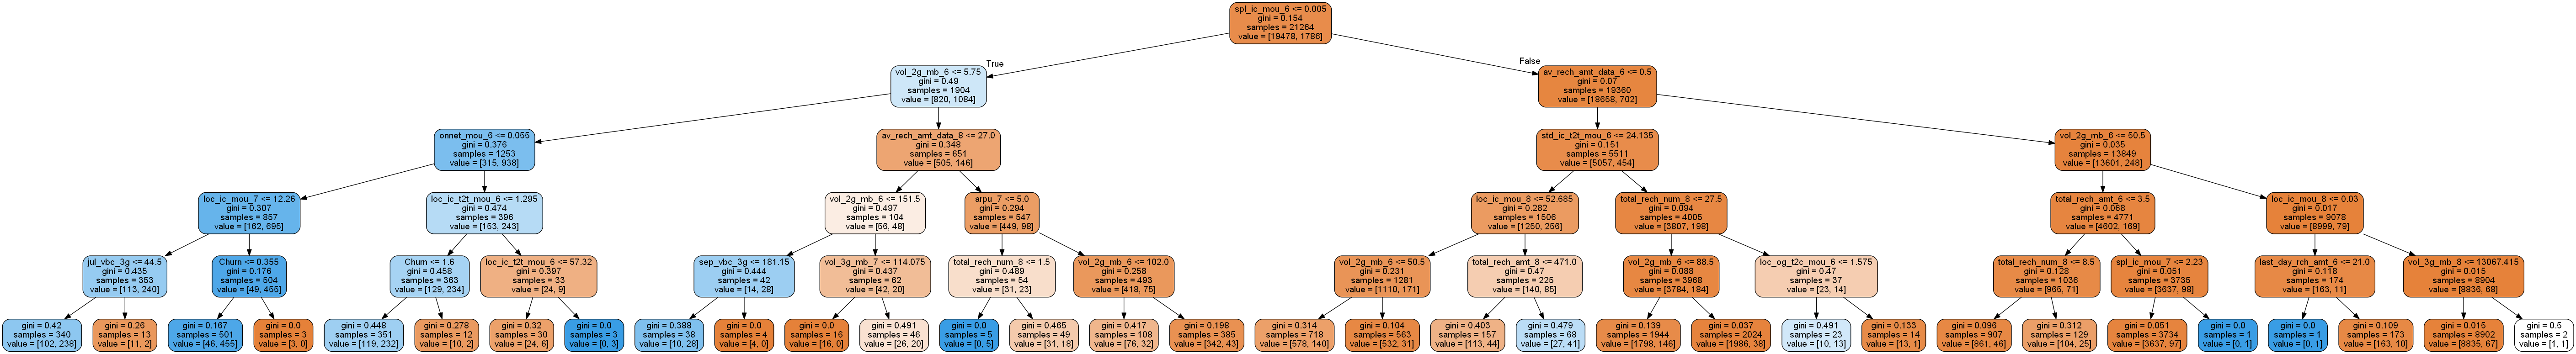

In [50]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [51]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [52]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.210038,0.036376,0.006982,0.002092,1,{'max_depth': 1},0.926657,0.928991,0.925935,0.933208,...,0.928424,0.002597,12,0.928865,0.928282,0.929046,0.927228,0.928697,0.928424,0.000649
1,0.329628,0.090312,0.005985,0.001410,2,{'max_depth': 2},0.943818,0.944745,0.944275,0.947554,...,0.944742,0.001483,1,0.945444,0.945447,0.945329,0.944745,0.945568,0.945307,0.000291
2,0.459419,0.039485,0.007779,0.004156,3,{'max_depth': 3},0.943818,0.944745,0.944275,0.947554,...,0.944742,0.001483,1,0.945444,0.945447,0.945329,0.944745,0.945568,0.945307,0.000291
3,0.889626,0.300556,0.007380,0.002054,4,{'max_depth': 4},0.943583,0.944745,0.943804,0.947554,...,0.944695,0.001485,3,0.946855,0.946388,0.946505,0.946038,0.946743,0.946506,0.000287
4,0.766950,0.098270,0.005985,0.002092,5,{'max_depth': 5},0.944053,0.945921,0.940042,0.947084,...,0.944178,0.002398,4,0.949089,0.947269,0.948680,0.948272,0.948566,0.948375,0.000612


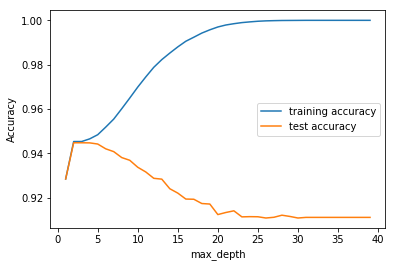

In [53]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [54]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [55]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.443469,0.626186,0.006583,0.001955,5,{'min_samples_leaf': 5},0.924542,0.924759,0.920997,0.927799,...,0.925038,0.002387,10,0.972193,0.971136,0.972253,0.970903,0.972549,0.971807,0.000658
1,1.837165,0.559873,0.008179,0.003646,25,{'min_samples_leaf': 25},0.937000,0.941923,0.934634,0.945673,...,0.939851,0.003835,9,0.951323,0.950973,0.952619,0.949918,0.950564,0.951079,0.000901
2,2.274137,0.451572,0.010772,0.004521,45,{'min_samples_leaf': 45},0.943583,0.941688,0.938867,0.945673,...,0.942673,0.002283,8,0.947913,0.947505,0.947387,0.946391,0.947802,0.947399,0.000539
3,1.451644,0.152852,0.006692,0.001168,65,{'min_samples_leaf': 65},0.944993,0.944510,0.937691,0.947789,...,0.943520,0.003352,6,0.947031,0.946446,0.946329,0.945627,0.946979,0.946482,0.000511
4,1.218023,0.204151,0.005392,0.001015,85,{'min_samples_leaf': 85},0.944053,0.942158,0.940042,0.947554,...,0.943096,0.002569,7,0.946443,0.945800,0.946740,0.944862,0.946156,0.946000,0.000649


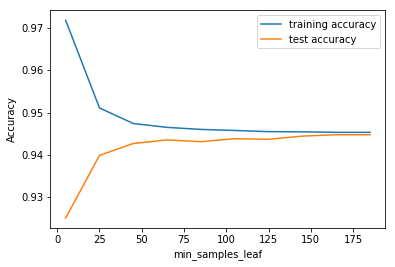

In [56]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [57]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [58]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.302970,0.225598,0.006583,0.002320,5,{'min_samples_split': 5},0.919370,0.914413,0.915824,0.911336,...,0.913986,0.003594,10,0.993416,0.993240,0.992652,0.994004,0.993416,0.993346,0.000433
1,3.306947,0.874138,0.006984,0.003159,25,{'min_samples_split': 25},0.925012,0.925700,0.924054,0.924271,...,0.923204,0.003165,9,0.968959,0.969902,0.970313,0.971138,0.972314,0.970525,0.001137
2,2.360093,0.066284,0.006783,0.001165,45,{'min_samples_split': 45},0.929478,0.933459,0.926640,0.931562,...,0.929129,0.003236,8,0.960964,0.961554,0.963847,0.962379,0.964907,0.962730,0.001457
3,3.030264,1.206918,0.016357,0.019366,65,{'min_samples_split': 65},0.931594,0.936045,0.933459,0.934619,...,0.932750,0.002772,7,0.956143,0.956734,0.958145,0.958324,0.960263,0.957922,0.001433
4,5.744848,0.639004,0.015161,0.006892,85,{'min_samples_split': 85},0.934650,0.937926,0.933929,0.940263,...,0.935431,0.003403,6,0.954909,0.953971,0.956028,0.955502,0.958088,0.955700,0.001376


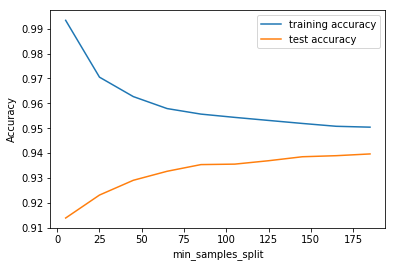

In [59]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [61]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.690712,0.324968,0.008977,0.001669,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.942172,...,0.944131,0.002183,1,0.946620,0.945565,0.946388,0.945215,0.946979,0.946153,0.000660
1,1.770960,0.492549,0.007779,0.001466,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.942172,...,0.944131,0.002183,1,0.946620,0.945565,0.946388,0.945215,0.946979,0.946153,0.000660
2,1.951191,0.439110,0.008179,0.001323,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.943112,...,0.943802,0.001890,7,0.945797,0.945447,0.945565,0.944862,0.946156,0.945565,0.000427
3,2.013108,0.452283,0.008179,0.000978,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.943112,...,0.943802,0.001890,7,0.945797,0.945447,0.945565,0.944862,0.946156,0.945565,0.000427
4,2.075801,0.454478,0.008770,0.005294,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.941702,...,0.942814,0.002560,15,0.947737,0.947387,0.947563,0.946508,0.948095,0.947458,0.000530
5,2.551333,0.977854,0.009768,0.003866,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.941702,...,0.942814,0.002560,15,0.947737,0.947387,0.947563,0.946508,0.948095,0.947458,0.000530
6,1.637898,0.298925,0.006975,0.001420,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.943112,...,0.943473,0.002114,11,0.945797,0.945741,0.945565,0.944862,0.946156,0.945624,0.000427
7,1.465534,0.197531,0.006384,0.000799,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.943112,...,0.943473,0.002114,11,0.945797,0.945741,0.945565,0.944862,0.946156,0.945624,0.000427
8,0.684773,0.094725,0.005386,0.001017,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.943818,...,0.943802,0.001953,7,0.946502,0.945565,0.947152,0.946273,0.946979,0.946494,0.000562
9,0.663956,0.066962,0.006184,0.001466,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.943818,...,0.943802,0.001953,7,0.946502,0.945565,0.947152,0.946273,0.946979,0.946494,0.000562


In [62]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9441309255079007
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [63]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [64]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9406407724380075

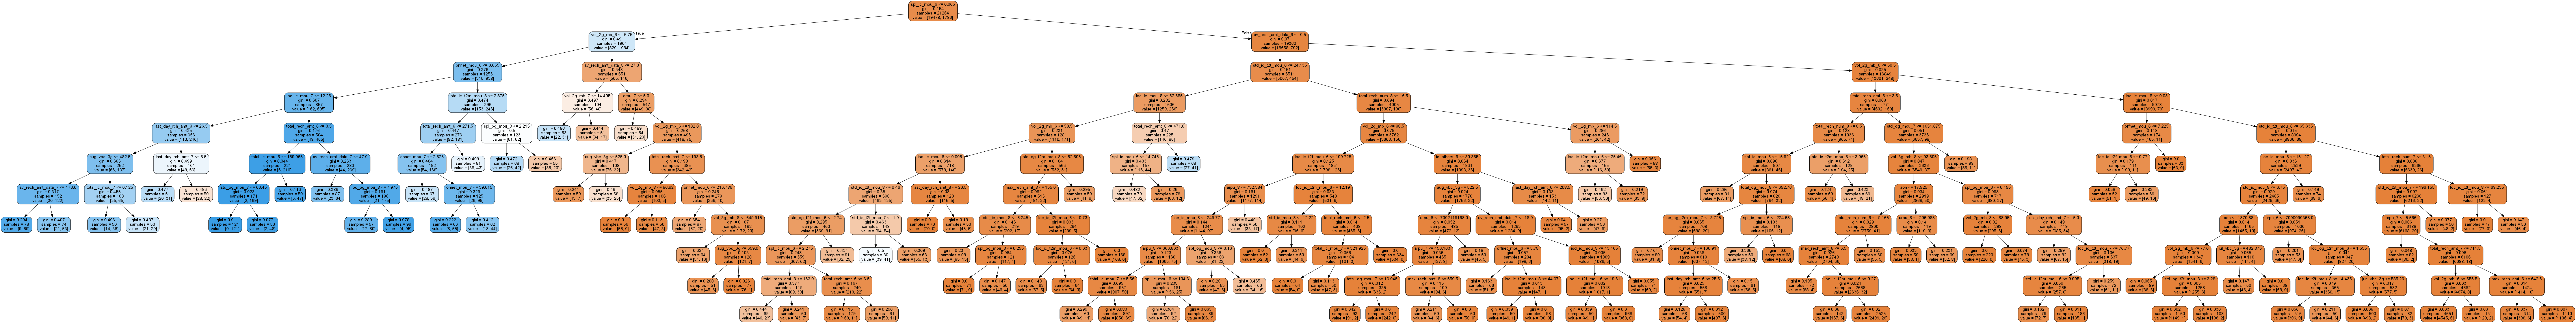

In [65]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [66]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.9447004608294931


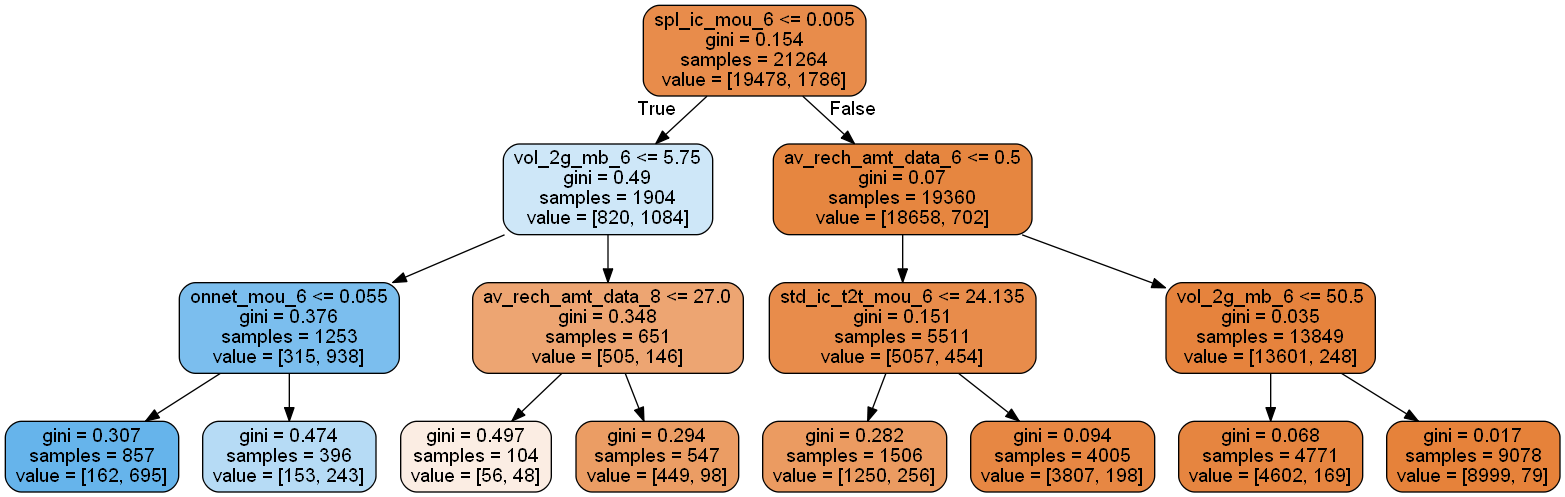

In [67]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [68]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8333
           1       0.75      0.53      0.62       781

   micro avg       0.94      0.94      0.94      9114
   macro avg       0.85      0.76      0.80      9114
weighted avg       0.94      0.94      0.94      9114



In [69]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[8194  139]
 [ 365  416]]
